In [1]:
# Import numpy
import numpy as np
import matplotlib.pyplot as plt

def forest_succession(transition_matrix, initial_pop, n_generations):
    """
    Simulates forest succession over time using matrix multiplication.

    Parameters
    ----------
    transition_matrix : 2D numpy array (square)
        The transition probabilities (each column should sum to 1).
        Rows = sapling species; Columns = adult species.

    initial_pop : 1D numpy array
        Initial population (or proportions) of each species.

    n_generations : int
        Number of replacement cycles (time steps) to simulate.

    Returns
    -------
    pops : 2D numpy array
        Population (or proportion) of each species at each time step.
        Rows = time steps, Columns = species.
    """
    # Make sure inputs are numpy arrays
    A = np.array(transition_matrix)
    x = np.array(initial_pop, dtype=float)
    
    # Normalize initial population (just in case)
    x = x / np.sum(x)

    # Store results
    pops = [x]

    # Iteratively apply the matrix for each generation
    for _ in range(n_generations):
        x = A @ x   # Matrix multiplication
        x = x / np.sum(x)  # Keep proportions normalized
        pops.append(x)
    
    return np.array(pops)

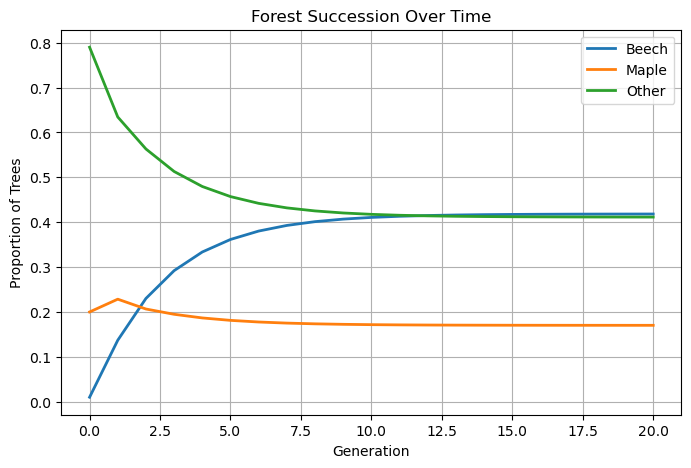

Final proportions after 20 generations:
[0.418 0.17  0.411]


In [2]:
# initialize the transition matrix A
A = np.array([
    [0.8, 0.25, 0.1],
    [0.1, 0.15, 0.25],
    [0.1, 0.6, 0.65]
])
# initialize the population vector with the initial populations
initial_pop = np.array([1, 20, 79])  # 1 Beech, 20 Maple, 79 Other

# Simulate for 20 generations
results = forest_succession(A, initial_pop, 20)

# Plot results
generations = np.arange(len(results))
plt.figure(figsize=(8, 5))
plt.plot(generations, results[:, 0], label="Beech", linewidth=2)
plt.plot(generations, results[:, 1], label="Maple", linewidth=2)
plt.plot(generations, results[:, 2], label="Other", linewidth=2)
plt.xlabel("Generation")
plt.ylabel("Proportion of Trees")
plt.title("Forest Succession Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Print final proportions
print("Final proportions after 20 generations:")
print(np.round(results[-1], 3))

In [3]:
# Transition matrix (from Table 13.1)
A = np.array([
    [0.8, 0.25, 0.1],
    [0.1, 0.15, 0.25],
    [0.1, 0.6, 0.65]
])

# Initial forest composition (Beech, Maple, Other)
x0 = np.array([0.01, 0.20, 0.79])

# -----------------------------------------
# Repeated multiplication (simulate 50 years)
# -----------------------------------------
x = x0.copy()
for t in range(50):
    x = A @ x         # Multiply by transition matrix
    x = x / np.sum(x) # Normalize (keep proportions summing to 1)

print("After 50 years (approx. stationary):")
print(np.round(x, 3))

After 50 years (approx. stationary):
[0.418 0.17  0.411]


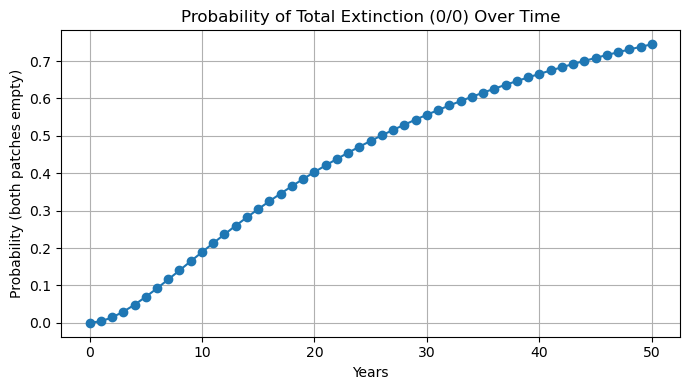

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- Transition matrix (from the table) ---
A = np.array([
    [1.0000, 0.029, 0.13, 0.0039],
    [0.0000, 0.95, 0.0026, 0.13],
    [0.0000, 0.0006, 0.85, 0.026],
    [0.0000, 0.019, 0.017, 0.84]
])

# --- Initial state vector (start with both patches occupied) ---
# Order of states: [0/0, 1/0, 0/1, 1/1]
P0 = np.array([0, 0, 0, 1])

# --- Simulate over 50 years ---
years = 50
P = P0.copy()
extinction_probs = [P[0]]  # track probability of total extinction (state 0/0)

for t in range(1, years + 1):
    P = A @ P
    extinction_probs.append(P[0])

# --- Plot results ---
plt.figure(figsize=(7, 4))
plt.plot(range(years + 1), extinction_probs, marker='o')
plt.title("Probability of Total Extinction (0/0) Over Time")
plt.xlabel("Years")
plt.ylabel("Probability (both patches empty)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import numpy as np

# Transition matrix (from before)
A = np.array([
    [1.0000, 0.029, 0.13, 0.0039],
    [0.0000, 0.95, 0.0026, 0.13],
    [0.0000, 0.0006, 0.85, 0.026],
    [0.0000, 0.019, 0.017, 0.84]
])

# Initial state: both occupied (1/1)
P0 = np.array([0, 0, 0, 1])

# Simulate for 50 years
P = P0.copy()
for t in range(50):
    P = A @ P

# Probability that both are extinct (state 0/0)
P_extinct = P[0]
print(f"Probability both patches extinct after 50 years: {P_extinct:.4f}")

Probability both patches extinct after 50 years: 0.7450
